In [237]:
import torch
import torchviz
import matplotlib.pyplot as plt

In [238]:
cuda=torch.device('cuda:0')

In [239]:
print(torch.cuda.is_available())  # Renvoie True si un GPU compatible CUDA est disponible

True


In [240]:
print(torch.cuda.get_device_capability(device=cuda))

(8, 6)


In [241]:
mu = 1
mb = 1024
T = 20
theta = torch.tensor([1.0])

In [242]:
def f(x,theta):
    return x + theta

In [243]:
def Lt(mb, T, theta):
    x = torch.distributions.MultivariateNormal(loc=torch.tensor([1.0]),covariance_matrix=torch.tensor([[1.0]])).sample((mb,))
    for _ in range(T):
        x = f(x,theta)
    return torch.square(x - torch.tensor([mu])).mean()

In [244]:
def derivative_Lt(T, theta):
    return 2*(T**2)*theta

In [245]:
def L(mb, T, theta):
    sum_Lt = 0
    for t in range(1,T+1):
        sum_Lt = sum_Lt + Lt(mb, t, theta)
    return sum_Lt

In [246]:
"""
def L(mb, T, theta):
    return Lt(mb, torch.tensor(torch.arange(1, T+1)), theta).sum()
"""

'\ndef L(mb, T, theta):\n    return Lt(mb, torch.tensor(torch.arange(1, T+1)), theta).sum()\n'

In [247]:
"""
Lt(mb, torch.tensor(torch.arange(1, T+1)), theta)
"""

'\nLt(mb, torch.tensor(torch.arange(1, T+1)), theta)\n'

In [248]:
def derivative_L(T, theta):
    sum_derivative_Lt = 0
    for t in range(1,T+1):
        sum_derivative_Lt = sum_derivative_Lt + derivative_Lt(t, theta)
    return sum_derivative_Lt

In [249]:
L(mb, T, theta)

tensor(2886.4741)

In [250]:
nb_epochs = 20
ind_epoch = 1
step = 0.0001
theta = torch.tensor([1.0],requires_grad=True)
liste_L = []
liste_grad = []

while ind_epoch <= nb_epochs:
    #gradient_reel = derivative_L(T, theta)
    loss_courante = L(mb, T, theta)
    loss_courante.backward()
    gradient = theta.grad
    theta = theta - step*gradient
    liste_L.append(loss_courante.detach().numpy())
    liste_grad.append(gradient.detach().numpy())
    ind_epoch += 1
    theta.retain_grad()

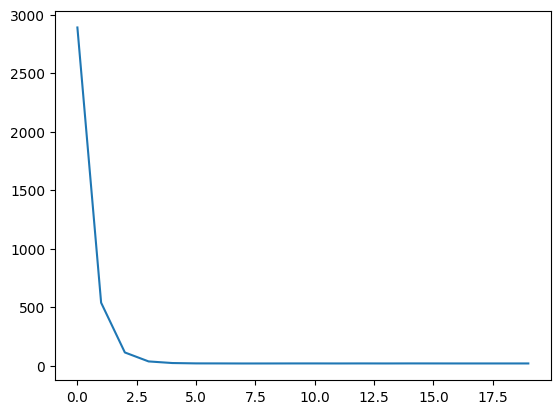

In [252]:
plt.plot(liste_L)
plt.show()

In [253]:
liste_L[-1]

array(19.985994, dtype=float32)

In [192]:
theta

tensor([3.8743e-08])

In [ ]:
max_iter = 100
for iter in range(max_iter):
    loss = L(mb, T, theta)
    loss.backward()
    theta = theta - step*theta.grad
    theta.retain_grad()

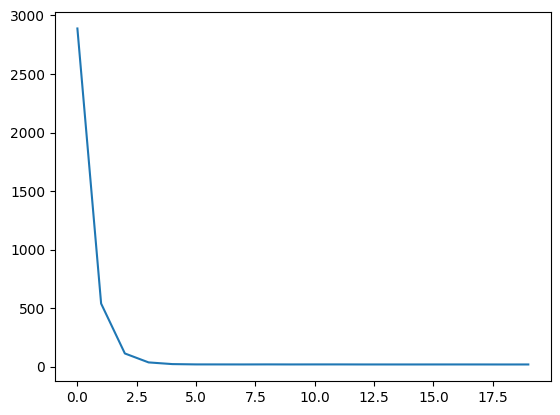

In [193]:
# version avec torch.optim.SGD
nb_epochs = 20
ind_epoch = 1
step = 0.0001
theta = torch.tensor([1.0],requires_grad=True)
liste_L = []
optimizer = torch.optim.SGD([theta],lr=step)

while ind_epoch <= nb_epochs:
    optimizer.zero_grad()
    loss = L(mb, T, theta)
    loss.backward()
    optimizer.step()
    liste_L.append(loss.item())
    ind_epoch += 1

plt.plot(liste_L)
plt.show()

In [194]:
liste_L[-1]

19.853771209716797

In [195]:
theta

tensor([6.5851e-05], requires_grad=True)

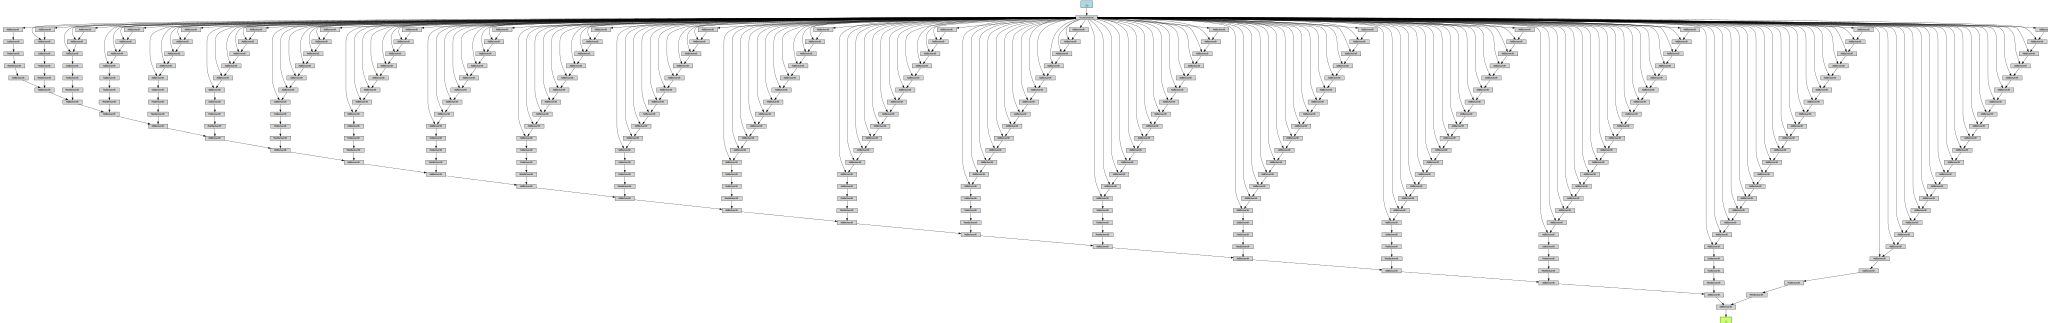

In [196]:
T = 3
torchviz.make_dot(loss)